### MODELO DE COMBUSTIÓN DE GAS METANO Y POLVO DE CARBÓN

**UNIVERSIDAD NACIONAL DE COLOMBIA SEDE MEDELLÍN**

**DESCRIPCIÓN DEL CÓDIGO:** Un modelo matemático unidimensional para describir los fenómenos de transferencia de masa y de calor que ocurren en una mina subterranea de carbón cuando ocurre una explosión se describe en el documento. El documento el cual es autocontenido incluye una descripción de los modelos implementados en python, líneas de código y una explicación de las líneas de código desarrolladas; con el objetivo de que este documento sea una herramienta versátil que se pueda entender y modificar con facilidad. El modelo busca representar un caso de la vida real el cual fue la explosión ocurrida en Boyaca en el municipio de Tasco en el cual se tiene evidencias de una explosión de gas y polvo de carbón.
La descripción del accidente se encuentra documentado en el siguiente Vinculo al final de la descripción del código.

El código incluye el modelo para describir las reacciones que se dan en la fase gaseosa producto de la combustión del carbón y/o metano. 

El código necesita la instalación de cantera para correr adecuadamente, debido a que las reacciones en la fase gaseosa se apoyaron en este software de código abierto para considerar mecanismos de reacción detallados y capturar adecuadamente especies intermedias que se forman en la combustión de cualquier combustible.

**Requiere:** cantera >= 2.5.0, scipy >= 0.19, matplotlib >= 2.0

**Descipción del accidente**

https://docs.google.com/document/d/1p7TO1gWR2jv7vn15xRMmFx2M5mcYAsD16kzEMsPducA/edit?usp=sharing

# <center> Descripción y lineas de código

**Paquetes de simulación usados**

Dado que en la simulación se usan diferentes librerias para modelar la galería en las primeras líneas del código se importan estas librerias. Entre las librerias se destaca **cantera** este software se debe instalar previamente para poderlo usar en la simulación (https://cantera.org/install/index.html) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.optimize import fsolve
from scipy.integrate import odeint
import cantera as ct
np.set_printoptions(threshold=np.inf) # print the entire variable to the screen

# <center> Modelo de la fase gaseosa - combustión del carbón

El modelo en la fase gaseosa considera el balance de masa de diferentes especies químicas que se consumen, se producen y reaccionan debido a la combustión del carbón y el metano. El modelo también considera el balance de energía en el sistema en donde se genera calor producto de las reacciones exotérmicas de la combustión. El modelo unidimensional construido, se simuló como un reactor batch acoplado a un reactor PFR, en el cual las especies químicas y la temperatura del gas cambian a lo largo del reactor, por lo tanto los balances de masa y energía se realizan sobre diferenciales de longitud o volumen como se muestra en la Figura:  

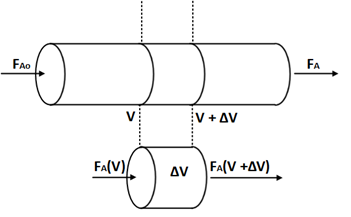

### Balance de masa (moles)
El balance de masa de las diferentes especies que intervienen en el reactor batch se puede describir por medio de la ecuación:

## $\frac{dN_i}{dt}=r_i \times V $                                       

Donde la ecuación diferencial nos indica como cambia las moles (N) de la especie (i) en el tiempo (dt), la cual depende de la velocidad de reacción de la especie en el sistema ($r_i$)

### Balance de energía
El balance de energía en la fase gaseosa se puede describir por medio de la ecuación:

## $\frac{dT}{dt}=\frac{Q_{gen} \ -  \ Q_{tranf}}{\sum_{i=1}^{m} N_i\ C_{pi}}$             

Donde la ecuación diferencial nos indica como cambia la temperatura del gas (T) en el tiempo (dt), la cual depende del calor generado por las reacciones químicas ($Q_{gen}$), el calor transferido a las paredes y a los gases inertes ($Q_{tranf}$), de las moles de gases ($N_i$) y la capacidad calorífica a volumen constante de estos ($C_{vi}$).

# <center> Composición del carbón usado como combustible

Los análisis próximos y últimos del carbón se usaron en el código para representar adecuadamente la combustión de este compuesto en el horno. Algunas de las propiedades del carbón fueron suministradas por Celsia y las propiedades que no se conocian se tomaron de la literatura (Barrera, Perez and Salazar, 2014), de acuerdo a las caracteristicas del carbón que se tenía. En las tablas siguientes se muestra los análisis últimos y próximos del carbón. 

<table style="width:25%">
    <tr>
        <td> $Análisis \ próximo$ </td>
        <td> $ \% \ wt$ </td>
    </tr>
    <tr>
        <td>  $Materia \ Volátil$ </td>
        <td> 39 </td>
    </tr>
    <tr>
        <td>  $Carbono  \ Fijo$ </td>
        <td> 52.81 </td>
    </tr>
    <tr>
        <td>  $Cenizas$ </td>
        <td> 4 </td>
    </tr>
    <tr>
        <td>  $Humedad$ </td>
        <td> 3.5 </td>    
    </tr>
    <tr>
        <td>  $Azufre$ </td>
        <td> 0.69 </td>    
    </tr>
</table>

<table style="width:25%">
    <tr>
        <td> $Poder \ calorífico$ </td>
        <td> $ 33600 \ kJ/kg $ </td>
    </tr>
</table>

<table style="width:50%">
    <tr>
        <td> $Análisis \ último$ </td>
        <td>  $\% \ wt$ </td>
        <td>  $Peso \ molecular$ </td>
    </tr>
    <tr>
        <td>  $C$ </td>
        <td> 77 </td>
        <td> 12.0107 </td>
    </tr>
    <tr>
        <td>  $H$ </td>
        <td> 5 </td>
        <td> 1.00784 </td>
    </tr>
    <tr>
        <td>  $N$ </td>
        <td> 0.15 </td>
        <td> 14.0067 </td>
    </tr>
    <tr>
        <td>  $O$ </td>
        <td> 17.16 </td>
        <td> 15.999 </td>
    </tr>
    <tr>
        <td>  $S$ </td>
        <td> 0.69 </td>
        <td> 32.065 </td>
    </tr>
</table>


In [2]:
# Análisis próximo
Porcentaje_volatiles = 39
Porcentaje_carbonoFijo = 52.81
Porcentaje_cenizas = 4
Porcentaje_azufre = 0.69
Porcentaje_humedad = 3.4
Poder_Calorifico_inferior = 33600              # kJ/kg

# Análisis último
Porcentaje_C = 77
Porcentaje_H = 5
Porcentaje_N = 0.15
Porcentaje_S = 0.69
Porcentaje_O = 17.16

## <center> Representación y modelado del carbón

Polvo de carbón es uno de los combustibles en las minas subterraneas de carbón. En la combustión de este combustible se da un fenómenos conocido como desvolatilización que se ilustran en la siguiente Figura:

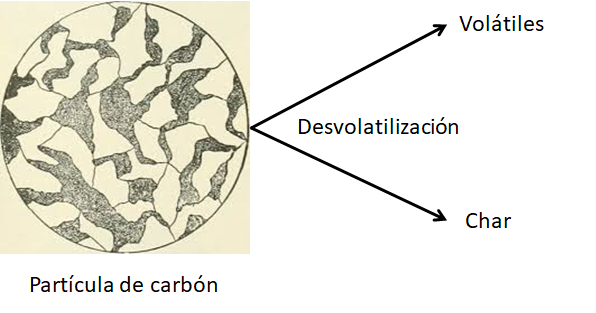

De acuerdo a la Figura, una partícula de carbón al calentarse sufre un fenómeno de desvolatilización que da como resultado unos compuestos gaseosos conocidos como volátiles y un compuesto sólido combustible conocido como char. Estos compuestos volátiles al igual que el char son los compuestos químicos que reaccionan en la combustión.

### Desvolatilización del carbón

La desvolatilización del polvo de carbón se modelo usando una única reacción de acuerdo al trabajo desarrollado por Biagini and Tognotti (2014).

## $\frac{dx_{volatiles}}{dt}= 8.7 \cdot exp^{-3.2e^4/(R  T)} \times (x_{volatiles_{Totales}} - x_{volatiles})$        

En donde la ecuación diferencial indica el cambio en el porcentaje de volátiles en el tiempo. 

## Representación de los volatiles y reacciones de combustión de estos compuestos 

Dado que los compuestos volátiles que salen del carbón son una mezcla compleja de hidrocarburos, en este trabajo se asumió que es posible representar estos volátiles por medio de los compuestos metano ($CH_4$), acetileno ($C_2H_2$) y monóxido de carbono ($CO$).
La distribución de volatiles en estos compuestos se realizó de acuerdo al análisis elemental y el poder calorífico del carbón.

Para representar las reacciones químicas se utilizó el mecanismo GRI - Mech 3.0 que es un mecanismo de combustión de gas natural, el cual contempla 53 especies químicas y 325 reacciones [2]. Los elementos y compuestos que contempla el mecanismo se ven en la Figura: 

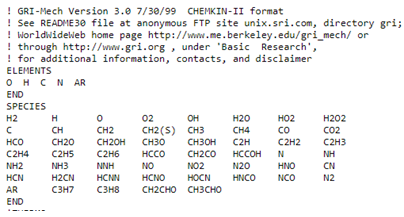

## Representación del char y reacciones de combustión de este compuesto 

Para la combustión del char se usó un mecanismo de la literatura (Maffei 2013). El mecanismo se muestra en la siguiente Tabla:


<table style="width:75%">
    <tr>
        <td> $Reacción \ química$ </td>
        <td> $Expresión \ cinética  [=] \frac{kmol}{m^3 s}$ </td>
        <td> $\Delta H°_r [=] \frac{kJ}{kmol}$ </td>
    </tr>
    <tr>
        <td> $CHAR_C + O_2 \rightarrow CO_2$</td>
        <td> $r_1 = 7.3*10^{7} e^{\frac{-1.35*10^5}{RT}} C_{CHAR_C}C_{O_2}$ </td>
        <td>  -393700 </td>
    </tr>
    <tr>
        <td> $CHAR_C + 0.5 O_2 \rightarrow CO$</td>
        <td> $r_2 = 1.5*10^{9} e^{\frac{-1.60*10^5}{RT}} C_{CHAR_C}C_{O_2}^{0.78}$ </td>
        <td>  -110500 </td>
    </tr>
    <tr>
        <td> $CHAR_C + H_2O \rightarrow H_2 + CO$</td>
        <td> $r_3 = 2.6*10^{8} e^{\frac{-2.03*10^5}{RT}} C_{CHAR_C}C_{H_2O}$ </td>
        <td>  131300 </td>
    </tr>
    <tr>
        <td> $CHAR_C + CO_2 \rightarrow 2CO$</td>
        <td> $r_4 = 8.1*10^{7} e^{\frac{-2.08*10^5}{RT}} C_{CHAR_C}C_{CO_2}$ </td>
        <td>  173000 </td>
    </tr>
</table>

# Especificaciones del problema y valores de entrada

En el siguiente bloque de código se indican los parámetros del problema, condiciones de operación y geometría de la galería. Estos datos son fundamentales y determinan como opera el horno. 

In [3]:
# Condiciones iniciales
P_0 = 85113                                     # Presión en [Pa]
T_0 = 1000 + 273.15                             # Temperatura en [K]
T_1 = 900 + 273.15 
Tiempo = 0.1                                    # Tiempo de simulación [s]

R = 8.31446261815324                           # Constante de gases [kJ/kmol/K]
Rg = 8.31446261815324e3                        # Constante de gases [m^3 Pa/kmol/K]

# Dimensiones de la sección de la galeria zona de ignición
area = 4                                       # Area [m^2]
longitud_0 = 1                                   # Longitud [m] 
Volumen_0 = longitud_0 * area                      # [m^3]

"Combustible"
Carbon_0 = 0.00005                                     # Polvo de carbón en [kg]
x_CH4_0 = 0.09                                   # Fracción molar

#Char = Carbon*Porcentaje_carbonoFijo/100        # Char en [kg]
SO2_0 = Carbon_0*Porcentaje_S*64/32/100             # [kg]
N2_comb_0 = Carbon_0*Porcentaje_N/100               # [kg]
H2O_0 = Carbon_0*Porcentaje_humedad/100             # [kg]

"Aire"
N2_Aire_0 = (1-x_CH4_0)*0.79*P_0*(Volumen_0)/(Rg*T_0)
O2_0 = (1-x_CH4_0)*0.21*P_0*(Volumen_0)/(Rg*T_0)                   # [kmol]

# Pesos moleculares
w_Char = 12.0107                                # [kg/kmol] 
w_CH4 = 16.04                                   # [kg/kmol]
w_C2H2 = 26.04                                  # [kg/kmol]
w_CO = 28.01                                    # [kg/kmol]
w_SO2 = 64.066                                  # [kg/kmol]
w_Aire = 28.97                                   # [kg/kmol]
w_CO2 = 44.01                                   # [kg/kmol]
w_H2 = 1.00784 * 2                              # [kg/kmol]
w_O2 = 15.999 * 2                               # [kg/kmol]
w_N2 = 14.0067 * 2                              # [kg/kmol]
w_H2O = 18.01528                                # [kg/kmol]

# Conversión a moles
F_CH4_0 = x_CH4_0*P_0*(Volumen_0)/(Rg*T_0)           # [kmol]
F_SO2_0 = SO2_0 / w_SO2               # [kmol]
F_N2_0 = N2_Aire_0 + N2_comb_0/ w_N2    # [kmol]
F_O2_0 = O2_0                         # [kmol]
F_H2O_0 = H2O_0 / w_H2O               # [kmol]
FT_0 = F_CH4_0*w_CH4 + F_O2_0*w_O2 + F_N2_0*w_N2
densidad_0 = FT_0/Volumen_0

# Moles de los gases inicial
concentracion_0 = {'N2':F_N2_0, 'O2':F_O2_0, 
                   'CH4':F_CH4_0, 'H2O':F_H2O_0}  # [kmol]

# Dimensiones de la sección de la galeria zona de explosión 
L_total = 3.5
n = 7
delta_L = L_total/n

longitud = np.zeros(n)
Volumen = np.zeros(n)
Carbon = np.zeros(n)
x_CH4 = np.zeros(n)
SO2 = np.zeros(n)
N2_comb = np.zeros(n)
H2O = np.zeros(n)
N2_Aire = np.zeros(n)
O2 = np.zeros(n)
F_CH4 = np.zeros(n)
F_SO2 = np.zeros(n)
F_N2 = np.zeros(n)
F_O2 = np.zeros(n)
F_H2O = np.zeros(n)
FT = np.zeros(n)
densidad = np.zeros(n)

for i in range(0,n):
    longitud[i] = delta_L                                # Longitud [m] 
    Volumen[i] = longitud[i] * area                      # [m^3]
    Carbon[i] = 0.0001                                # Polvo de carbón en [kg]
    x_CH4[i] = 0.09                                      # Metano inicial [m3]
    SO2[i] = Carbon[i]*Porcentaje_S*64/32/100             # [kg]
    N2_comb[i] = Carbon[i]*Porcentaje_N/100               # [kg]
    H2O[i] = Carbon[i]*Porcentaje_humedad/100             # [kg]
    N2_Aire[i] = (1-x_CH4[i])*0.79*P_0*(Volumen[i])/(Rg*T_1)              # [kmol]
    O2[i] = (1-x_CH4[i])*0.21*P_0*(Volumen[i])/(Rg*T_1)                  # [kmol]
    F_CH4[i] = x_CH4[i]*P_0*(Volumen[i])/(Rg*T_1)          # [kmol]
    F_SO2[i] = SO2[i] / w_SO2               # [kmol]
    F_N2[i] = N2_Aire[i] + N2_comb[i]/ w_N2    # [kmol]
    F_O2[i] = O2[i]                         # [kmol]
    F_H2O[i] = H2O[i] / w_H2O               # [kmol]
    FT[i] = F_CH4[i]*w_CH4 + F_O2[i]*w_O2 + F_N2[i]*w_N2
    densidad[i] = FT[i]/Volumen[i]
    
concentracion_1 = {'N2':F_N2[0], 'O2':F_O2[0], 
                   'CH4':F_CH4[0], 'H2O':F_H2O[0]}  # [kmol]

# Dado que hay algunas especies que pueden ser de nuestro interes, las vamos a agrupar para posteriormente graficarlas
# de una manera más sencilla
# Especies reactivos
species_reac = ['CO', 'CO2', 'O2', 'CH4', 'C2H2', 'H2O']            

# Especies nitrogenadas
species_NOx = ['NO', 'NO2', 'N2O']             

# Especies intermediadas altamente reactivas y que son fundamentales en la combustion
species_inter = ['OH', 'H', 'O', 'CO']         


# Debido a que vamos a resolver ecuaciones diferenciales, es necesario especificar cuantas divisiones vamos a realizar 
# del dominio de simulación para resolver por un metodo numerico las ecuaciones diferenciales
n_steps = 1999
dt = Tiempo / n_steps                        # [s]

# En la fase gaseosa vamos a importar el modelo GRI Mech 3.0 de cantera
reaction_mechanism = 'gri30.yaml'
gas = ct.Solution(reaction_mechanism)
gas1 = ct.Solution(reaction_mechanism)

species = gas.species_names # Asignamos un vector con los nombres de las especies del mecanismo GRI Mech

# Especificamos los condiciones iniciales de las variables que vamos a resolver
F_Char0 = 0
F_Char1 = 0
F_Volatiles0 = 0
F_Volatiles1 = 0
F_i0 = np.zeros(len(species))
F_i1 = np.zeros(len(species))
print(len(F_i0))
for i,specie in enumerate(species):
    for key in concentracion_0:
        if specie == key:
            F_i0[i] = concentracion_0[key]
            F_i1[i] = concentracion_1[key]
            
gas.TDX = T_0, densidad_0, concentracion_0   # Con esta instrucción cantera calcula las especies en equilibrio a estas condiciones

for i in range(0,n):
    gas1[i].TDX = T_1, densidad[0], concentracion_1   # Con esta instrucción cantera calcula las especies en equilibrio a estas condiciones


53


## Ecuación diferencial para resolver el balance de masa y energía de la fase gaseosa

Las ecuaciones diferenciales para resolver los balances de masa y energía de las especies en la fase gaseosa se definen por medio de una función en python. En el siguiente bloque de código se muestra la función creada en este caso.

In [4]:
class ODE_Reactor_function:
    
    def __init__(self, gas, F_SO2_0, gas1, F_SO2_1, L_total, n):
        # En la funcion incluimos una seríe de parametros que necesitamos para resolver el problema
        self.gas = gas
        self.P = gas.P
        self.F_SO2_0 = F_SO2_0
        self.gas1 = gas1
        self.P1 = gas1.P
        self.F_SO2_1 = F_SO2_1
        self.L_total = L_total
        self.n = n

    def __call__(self, t, y):
        """
        La funcion ODE trata de resolver el siguiente sistema de ecuaciones, y' = f(V,y) 
        
        Unidades y ubicación de las variables:
        y[0]: Temperatura del gas----[K]
        y[1]: Masa de volatiles--[kg]
        y[2]: Moles del char------[kmol]
        y[3:]: Moles de las especies gaseosas---[kmol]
        
        """
        n = self.n
        T_0 = y[0]                                # [K]
        R = 8.31446261815324                          # Constante de gases [kJ/kmol/K]
        Rg = 8.31446261815324e3                       # Constante de gases [m^3 Pa/kmol/K]
        
        # Dimensiones de la sección de la galeria
        area = 4                                       # Area [m^2]
        longitud_0 = 1                                   # longitud
        longitud_1 = 1                                   # longitud
        Volumen_0 = longitud_0 * area                      # [m^3]
        Volumen_1 = longitud_1 * area                      # [m^3]
    
        "Balance de moles de la fase gaseosa"
        # Las especies gaseosas se encuentran ubicadas despues de la columna 3
        F_i_0 = y[4:57]                                  # Moles de especies gaseosas [kmol]
        masa_0 = gas.molecular_weights*F_i_0
        densidad_0 = sum(masa_0)/Volumen_0
        self.gas.TDX = T_0, densidad_0, F_i_0          # Calculo de equilibrio en cantera para cada paso de tiempo[K], [Pa], [-]
        T_1 = np.zeros(n)
        F_i_1 = np.zeros(n*53)
        masa = np.zeros(n*53)
        densidad = np.zeros(n)
        for i in range(0,n):
            T_1[i] = y[56+i*57+1]                                # [K]
            F_i_1[53*i:53*i+53] = y[56+i*57+5:56+(i+1)*57+1]                                  # Moles de especies gaseosas [kmol]
            masa[53*i:53*i+53] = gas.molecular_weights*F_i_1[53*i:53*i+53]
            densidad[i] = sum(masa[53*i:53*i+53])/Volumen_1
            self.gas1.TDX = T_1[i], densidad[i], F_i_1[53*i:53*i+53]          # Calculo de equilibrio en cantera para cada paso de tiempo[K], [Pa], [-]
        
        # Dimensiones de la sección de la galeria
        area = 4                                       # Area [m^2]
        longitud_0 = 1                                   # longitud
        longitud_1 = self.L_total/self.n                                  # longitud
        Volumen_0 = longitud_0 * area                      # [m^3]
        Volumen_1 = longitud_1 * area                      # [m^3]

        # Los componentes del carbon volatiles y char se encuentran ubicados en la posición 1 y 2
        F_Volatiles_0 = y[2]                                                   # Masa [kg]
        F_Char_0 = y[3]                                                        # Moles [kmol]

        F_H2_0 = F_i_0[0]                                                        # Moles de hidrogeno[kmol]
        F_O2_0 = F_i_0[3]                                                        # Moles de oxigeno[kmol]
        F_H2O_0 = F_i_0[5]                                                       # Moles de vapor de agua [kmol]
        F_CO_0 = F_i_0[14]                                                       # Moles de monoxido de carbono[kmol]
        F_CO2_0 = F_i_0[15]                                                      # Moles de dioxido de carbono[kmol]
        FT_0 = sum(F_i_0) + self.F_SO2_0                                           # Moles de todas las especies [kmol]
        dot_V_0 = FT_0 * Rg * T_0 / self.P 
        delta_V_0 = (dot_V_0 - Volumen_0)/dt
        F_out_0 = delta_V_0*self.P /(Rg * T_0)
             
        F_Volatiles_1 = np.zeros(n)
        F_Char_1 = np.zeros(n)
        F_H2_1 = np.zeros(n)
        F_O2_1 = np.zeros(n)
        F_H2O_1 = np.zeros(n)
        F_CO_1 = np.zeros(n)
        F_CO2_1 = np.zeros(n)
        FT_1 = np.zeros(n)
        dot_V_1 = np.zeros(n)
        delta_V_1 = np.zeros(n)
        F_out_1 = np.zeros(n)
        for i in range(0,n):
            F_Volatiles_1[i] = y[56+i*57+3]                                                   # Masa [kg]
            F_Char_1[i] = y[56+i*57+4]                                                        # Masa [kg]
            F_H2_1[i] = F_i_1[53*i]                                                        # Moles de hidrogeno[kmol]
            F_O2_1[i] = F_i_1[53*i+3]                                                        # Moles de oxigeno[kmol]
            F_H2O_1[i] = F_i_1[53*i+5]                                                       # Moles de vapor de agua [kmol]
            F_CO_1[i] = F_i_1[53*i+14]                                                       # Moles de monoxido de carbono[kmol]
            F_CO2_1[i] = F_i_1[53*i+15]                                                      # Moles de dioxido de carbono[kmol]
            FT_1[i] = sum(F_i_1[53*i:53*(i+1)]) + self.F_SO2_1                                           # Moles de todas las especies [kmol]
            dot_V_1[i] = FT_1[i] * Rg * T_1[i] / self.P1                                       # Volumen [m^3]
            delta_V_1[i] = (dot_V_1[i] - Volumen_1)/dt                                     # Diferencia de volumen [m^3/s]
            F_out_1[i] = delta_V_1[i]*self.P /(Rg * T_1[i])                                   # Diferencia de volumen [kmol/s]

        
        Volatiles_prod_0 = Carbon_0*0.39                                         # Cantidad total de volatiles en el carbón [kg]
        C_Volatiles_0 = F_Volatiles_0 / Volumen_0                                  # Concentración de volatiles [kg/m^3]
        C_Volatiles_F_0 = Volatiles_prod_0/ Volumen_0                              # Concentración máxima de volatiles [kg/m^3]
        C_Char_0 = F_Char_0 / Volumen_0                                            # Concentración de char [kmol/m^3]
        C_H2_0 = F_H2_0 / Volumen_0                                                # Concentración de hidrogeno [kmol/m^3]
        C_O2_0 = F_O2_0 / Volumen_0                                                # Concentración de oxigeno[kmol/m^3]
        C_H2O_0 = F_H2O_0/ Volumen_0                                              # Concentración de vapor de agua [kmol/m^3]
        C_CO_0 = F_CO_0 / Volumen_0                                                # Concentración de monoxido de carbono[kmol/m^3]
        C_CO2_0 = F_CO2_0 / Volumen_0                                              # Concentración de dioxido de carbono[kmol/m^3]
        
        Volatiles_prod_1 = np.zeros(n)
        C_Volatiles_1 = np.zeros(n)
        C_Volatiles_F_1 = np.zeros(n)
        C_Char_1 = np.zeros(n)
        C_H2_1 = np.zeros(n)
        C_O2_1 = np.zeros(n)
        C_H2O_1 = np.zeros(n)
        C_CO_1 = np.zeros(n)
        C_CO2_1 = np.zeros(n)
        for i in range(0,n):
            Volatiles_prod_1[i] = Carbon[i]*0.39                                         # Cantidad total de volatiles en el carbón [kg]
            C_Volatiles_1[i] = F_Volatiles_1[i] / Volumen_1                                  # Concentración de volatiles [kg/m^3]
            C_Volatiles_F_1[i] = Volatiles_prod_1[i]/ Volumen_1                              # Concentración máxima de volatiles [kg/m^3]
            C_Char_1[i] = F_Char_1[i] / Volumen_1                                            # Concentración de char [kmol/m^3]
            C_H2_1[i] = F_H2_1[i] / Volumen_1                                                # Concentración de hidrogeno [kmol/m^3]
            C_O2_1[i] = F_O2_1[i] / Volumen_1                                                # Concentración de oxigeno[kmol/m^3]
            C_H2O_1[i] = F_H2O_1[i]/ Volumen_1                                              # Concentración de vapor de agua [kmol/m^3]
            C_CO_1[i] = F_CO_1[i] / Volumen_1                                                # Concentración de monoxido de carbono[kmol/m^3]
            C_CO2_1[i] = F_CO2_1[i] / Volumen_1                                              # Concentración de dioxido de carbono[kmol/m^3] 
       
        # Reacción de desvolatilización del carbón 
        r_desv_0 = (8.7e0 * np.exp(-3.2e4 / (R * T_0)) * (C_Volatiles_F_0 - C_Volatiles_0))       # [kg/m^3/s] 
        r_desv_1 = np.zeros(n)
        for i in range(0,n):
            r_desv_1[i] = (8.7e0 * np.exp(-3.2e4 / (R * T_1[i])) * (C_Volatiles_F_1[i] - C_Volatiles_1[i]))       # [kg/m^3/s]
    
        # Reacciones de combustión del char  
        r_1_0 = (-7.3e5 * np.exp(-1.35e5 / (R * T_0)) * C_Char_0 * C_O2_0)                        # [kmol/m^3/s]
        r_2_0 = (-1.5e7 * np.exp(-1.60e5 / (R * T_0)) * C_Char_0 * (C_O2_0)**0.78)                # [kmol/m^3/s]
        r_3_0 = (-2.6e6 * np.exp(-2.03e5 / (R * T_0)) * C_Char_0 * C_H2O_0)                       # [kmol/m^3/s]
        r_4_0 = (-8.1e5 * np.exp(-2.08e5 / (R * T_0)) * C_Char_0 * C_CO2_0)                       # [kmol/m^3/s]
        
        # Reacciones de combustión del char
        r_1_1 = np.zeros(n)
        r_2_1 = np.zeros(n)
        r_3_1 = np.zeros(n)
        r_4_1 = np.zeros(n)
        for i in range(0,n):
            r_1_1[i] = (-7.3e5 * np.exp(-1.35e5 / (R * T_1[0])) * C_Char_1[i] * C_O2_1[i])                        # [kmol/m^3/s]
            r_2_1[i] = (-1.5e7 * np.exp(-1.60e5 / (R * T_1[0])) * C_Char_1[i] * (C_O2_1[i])**0.78)                # [kmol/m^3/s]
            r_3_1[i] = (-2.6e6 * np.exp(-2.03e5 / (R * T_1[0])) * C_Char_1[i] * C_H2O_1[i])                       # [kmol/m^3/s]
            r_4_1[i] = (-8.1e5 * np.exp(-2.08e5 / (R * T_1[0])) * C_Char_1[i] * C_CO2_1[i])                       # [kmol/m^3/s]

        # Velocidades netas de reacción de los compuestos involucrados en las reacciones del char
        r_Volatiles_0 = r_desv_0                                             # [kg/m^3/s] 
        r_Char_0 = r_1_0 + r_2_0 + r_3_0 + r_4_0 + r_desv_0/12*0.5281/0.39   # [kmol/m^3/s]
        r_H2_0 = -r_3_0                                                      # [kmol/m^3/s]
        r_O2_0 = r_1_0 + 0.5 * r_2_0                                         # [kmol/m^3/s]
        r_H2O_0 = r_3_0                                                      # [kmol/m^3/s]
        r_CO_0 = -r_2_0 - r_3_0 - 2 * r_4_0 + 0.4142*r_desv_0/28             # El ultimo termino tiene es el CO producido por desvolatilizacion
        r_CO2_0 = -r_1_0 + r_4_0                                             # [kmol/m^3/s]
        
        r_Volatiles_1 = np.zeros(n)
        r_Char_1 = np.zeros(n)
        r_H2_1 = np.zeros(n)
        r_O2_1 = np.zeros(n)
        r_H2O_1 = np.zeros(n)
        r_CO_1 = np.zeros(n)
        r_CO2_1 = np.zeros(n)
        for i in range(0,n):
            r_Volatiles_1[i] = r_desv_1[i] 
            r_Char_1[i] = r_1_1[i] + r_2_1[i] + r_3_1[i] + r_4_1[i] + r_desv_1[i]/12*0.5281/0.39   # [kmol/m^3/s]# [kg/m^3/s] 
            r_H2_1[i] = -r_3_1[i]                                                      # [kmol/m^3/s]
            r_O2_1[i] = r_1_1[i] + 0.5 * r_2_1[i]                                         # [kmol/m^3/s]
            r_H2O_1[i] = r_3_1[i]                                                      # [kmol/m^3/s]
            r_CO_1[i] = -r_2_1[i] - r_3_1[i] - 2 * r_4_1[i] + 0.4142*r_desv_1[i]/28             # El ultimo termino tiene es el CO producido por desvolatilizacion
            r_CO2_1[i] = -r_1_1[i] + r_4_1[i]                                             # [kmol/m^3/s]
        
        # Termino de la ecuación diferencial para cada especie debido a la reacción del char y desvolatilización 
        dF_H2_dV_0 = r_H2_0                                                      # [kmol/m^3/s]
        dF_O2_dV_0 = r_O2_0                                                      # [kmol/m^3/s]
        dF_H2O_dV_0 = r_H2O_0                                                    # [kmol/m^3/s]
        dF_CO_dV_0 = r_CO_0                                                      # [kmol/m^3/s]
        dF_CO2_dV_0 = r_CO2_0                                                    # [kmol/m^3/s]
        dF_CH4_dV_0 = 0.5672*r_desv_0/16                                         # [kmol/m^3/s]
        dF_C2H2_dV_0 = 0.0093*r_desv_0/26                                        # [kmol/m^3/s]
        
        dF_H2_dV_1 = np.zeros(n)
        dF_O2_dV_1 = np.zeros(n)
        dF_H2O_dV_1 = np.zeros(n)
        dF_CO_dV_1 = np.zeros(n)
        dF_CO2_dV_1 = np.zeros(n)
        dF_CH4_dV_1 = np.zeros(n)
        dF_C2H2_dV_1 = np.zeros(n)
        for i in range(0,n):
            dF_H2_dV_1[i] = r_H2_1[i]                                                      # [kmol/m^3/s]
            dF_O2_dV_1[i] = r_O2_1[i]                                                      # [kmol/m^3/s]
            dF_H2O_dV_1[i] = r_H2O_1[i]                                                    # [kmol/m^3/s]
            dF_CO_dV_1[i] = r_CO_1[i]                                                      # [kmol/m^3/s]
            dF_CO2_dV_1[i] = r_CO2_1[i]                                                    # [kmol/m^3/s]
            dF_CH4_dV_1[i] = 0.5672*r_desv_1[i]/16                                         # [kmol/m^3/s]
            dF_C2H2_dV_1[i] = 0.0093*r_desv_1[i]/26                                        # [kmol/m^3/s]
   
        dFi_gas_char_0 = np.zeros(len(F_i_0))
        # posiciones de especies: "H2:0", "O2:3", "H2O:5", "CO:14", "CO2:15"
        
        dFi_gas_char_0[0] = dF_H2_dV_0                                           # [kmol/m^3/s]
        dFi_gas_char_0[3] = dF_O2_dV_0                                           # [kmol/m^3/s]
        dFi_gas_char_0[5] = dF_H2O_dV_0                                          # [kmol/m^3/s]
        dFi_gas_char_0[14] = dF_CO_dV_0                                          # [kmol/m^3/s]
        dFi_gas_char_0[15] = dF_CO2_dV_0                                         # [kmol/m^3/s] 
        dFi_gas_char_0[13] = dF_CH4_dV_0                                         # [kmol/m^3/s]
        dFi_gas_char_0[22] = dF_C2H2_dV_0                                        # [kmol/m^3/s] 
        
        dFi_gas_char_1 = np.zeros(len(F_i_1))
        # posiciones de especies: "H2:0", "O2:3", "H2O:5", "CO:14", "CO2:15"
        for i in range(0,n):
            dFi_gas_char_1[53*i] = dF_H2_dV_1[i]                                           # [kmol/m^3/s]
            dFi_gas_char_1[53*i+3] = dF_O2_dV_1[i]                                           # [kmol/m^3/s]
            dFi_gas_char_1[53*i+5] = dF_H2O_dV_1[i]                                          # [kmol/m^3/s]
            dFi_gas_char_1[53*i+14] = dF_CO_dV_1[i]                                          # [kmol/m^3/s]
            dFi_gas_char_1[53*i+15] = dF_CO2_dV_1[i]                                         # [kmol/m^3/s] 
            dFi_gas_char_1[53*i+13] = dF_CH4_dV_1[i]                                         # [kmol/m^3/s]
            dFi_gas_char_1[53*i+22] = dF_C2H2_dV_1[i]                                        # [kmol/m^3/s]
    
        if delta_V_0 < 0:
            F_out_0 = 0   
        
        for i in range(0,n):
            if delta_V_1[i] < 0:
                F_out_1[i] = 0 
        
        F_sal_0 = F_i_0*F_out_0/FT_0                                             # [kmol/s]
        F_sal_char_0 = F_Char_0*F_out_0/FT_0
        F_sal_carbon_0 = Carbon_0*F_out_0/FT_0
        
        coe = 1
        F_sal_1 = np.zeros(n*53)
        F_sal_char_1 = np.zeros(n)
        F_sal_carbon = np.zeros(n)
        for i in range(0,n):
            F_sal_1[53*i:53*(i+1)] = coe*F_i_1[53*i:53*(i+1)]*F_out_1[i]/FT_1[i]
            F_sal_char_1[i] = coe*F_Char_1[i]*F_out_1[i]/FT_1[i]
            F_sal_carbon[i] = Carbon[i]*F_out_1[i]/FT_1[i]
        
    
        "Ecuación diferenciales a resolver"
        dFi_gas_dV_0 = self.gas.net_production_rates                         # Velocidades de reacción en la fase gaseosa[kmol/m^3/s]
        dFi_gas_dt_0 = (dFi_gas_dV_0 + dFi_gas_char_0)*Volumen_0 - F_sal_0   # Velocidades de reacción totales [kmol/s]
        dF_Char_dt_0 = r_Char_0*Volumen_0 - F_sal_char_0                     # Ecuación diferencial del char [kmol/s]
        dF_Volatiles_dt_0 = r_Volatiles_0*Volumen_0       # Ecuación diferencial de los volatiles [kmol/s]
        dF_Carbon_dt_0 = -r_Volatiles_0*Volumen_0 - F_sal_carbon_0
         
        dFi_gas_dV_1 = np.zeros(n*53)
        dFi_gas_dt_1 = np.zeros(n*53)
        dF_Char_dt_1 = np.zeros(n)
        dF_Volatiles_dt_1 = np.zeros(n)
        dF_Carbon_dt_1 = np.zeros(n)
        for i in range(0,n):
            self.gas1.TPX = T_1[i], self.P, F_i_1[53*i:53*i+53]                         # Velocidades de reacción en la fase gaseosa[kmol/m^3/s]
            dFi_gas_dV_1[53*i:53*(i+1)] = self.gas1.net_production_rates 
            if i == 0:
                dFi_gas_dt_1[53*i:53*(i+1)] = (dFi_gas_dV_1[53*i:53*(i+1)]  + dFi_gas_char_1[53*i:53*(i+1)])*Volumen_1 + F_sal_0[53*i:53*(i+1)] - F_sal_1[53*i:53*(i+1)]    # Velocidades de reacción totales [kmol/s]
                dF_Char_dt_1[i] = r_Char_1[i]*Volumen_1 + F_sal_char_0 - F_sal_char_1[i]                     # Ecuación diferencial del char [kmol/s]
                dF_Carbon_dt_1[i] = -r_Volatiles_1[i]*Volumen_1 + F_sal_carbon_0 - F_sal_carbon[i]
            else:
                dFi_gas_dt_1[53*i:53*(i+1)] = (dFi_gas_dV_1[53*i:53*(i+1)]  + dFi_gas_char_1[53*i:53*(i+1)])*Volumen_1 + F_sal_1[53*(i-1):53*(i)] - F_sal_1[53*i:53*(i+1)]    # Velocidades de reacción totales [kmol/s]
                dF_Char_dt_1[i] = r_Char_1[i]*Volumen_1 + F_sal_char_1[i-1] - F_sal_char_1[i]                     # Ecuación diferencial del char [kmol/s]
                dF_Carbon_dt_1[i] = -r_Volatiles_1[i]*Volumen_1 + F_sal_carbon[i-1] - F_sal_carbon[i]
            dF_Volatiles_dt_1[i] = r_Volatiles_1[i]*Volumen_1       # Ecuación diferencial de los volatiles [kmol/s]
    
        "Balance de energía"
        sum_i_gas_0 = sum(F_i_0) * self.gas.cp_mole                # Capacidad calorifica del gas [J/K]
        T_ref = 298.15                                             # Temperatura de referencia [K]
        Q_gen_gases_0 = -np.dot(self.gas.partial_molar_enthalpies, (dFi_gas_dV_0)) # Calor generado [J/m^3/s]
        
        sum_i_gas_1 = np.zeros(n)
        Q_gen_gases_1 = np.zeros(n)
        for i in range(0,n):
            self.gas1.TPX = T_1[i], self.P, F_i_1[53*i:53*i+53]
            sum_i_gas_1[i] = sum(F_i_1[53*i:53*(i+1)]) * self.gas1.cp_mole                # Capacidad calorifica del gas [J/K/s]                                           # Temperatura de referencia [K]
            Q_gen_gases_1[i] = -np.dot(self.gas1.partial_molar_enthalpies, (dFi_gas_dV_1[53*i:53*(i+1)])) # Calor generado [J/m^3/s]
        
        Cp_Char = 144.9                                            # Capacidad calorifica del char [J/kmol/K] 
        
        "Entalpias estandar de reacción del mecanismo del char"
        DHrxn_1o = -393700000                                                   # [J/kmol]
        DHrxn_2o = -110500000                                                   # [J/kmol] 
        DHrxn_3o =  131300000                                                   # [J/kmol] 
        DHrxn_4o =  173000000                                                   # [J/kmol] 
        
        # Entalpias de reacción a la temperatuta del gas
        DHrxn_1_0 = DHrxn_1o + Cp_Char*(T_0 - T_ref)                      # [J/kmol]
        DHrxn_2_0 = DHrxn_2o + Cp_Char*(T_0 - T_ref)                      # [J/kmol]
        DHrxn_3_0 = DHrxn_3o + Cp_Char*(T_0 - T_ref)                      # [J/kmol]
        DHrxn_4_0 = DHrxn_4o + Cp_Char*(T_0 - T_ref)                      # [J/kmol]
        
        # Entalpias de reacción a la temperatuta del gas
        DHrxn_1_1 = np.zeros(n)
        DHrxn_2_1 = np.zeros(n)
        DHrxn_3_1 = np.zeros(n)
        DHrxn_4_1 = np.zeros(n)
        for i in range(0,n):
            DHrxn_1_1[i] = DHrxn_1o + Cp_Char*(T_1[i] - T_ref)                      # [J/kmol]
            DHrxn_2_1[i] = DHrxn_2o + Cp_Char*(T_1[i] - T_ref)                      # [J/kmol]
            DHrxn_3_1[i] = DHrxn_3o + Cp_Char*(T_1[i] - T_ref)                      # [J/kmol]
            DHrxn_4_1[i] = DHrxn_4o + Cp_Char*(T_1[i] - T_ref)                      # [J/kmol]
        
        # Calor generado por las reacciones del char
        Q_gen_char_0 = r_1_0*DHrxn_1_0 + r_2_0*DHrxn_2_0 + + r_3_0*DHrxn_3_0 + r_4_0*DHrxn_4_0       # J/m^3/s
        
        # Capacidad calorifica del SO2          
        Cp_SO2_0 = (25.78 + 5.795e-2 * T_0 - 3.812e-5 * T_0**2 + 8.612e-9 * T_0**3)/1e3      # [J/kmol/K]
        # Capacidad calorifica de todos los compuestos en la fase gaseosa
        sum_i_char_0 = (Cp_Char * F_Char_0 + Cp_SO2_0 * self.F_SO2_0)             # [J/K]
        sum_i_0 = sum_i_gas_0 + sum_i_char_0                                       # [J/K]
        #Flujo salida de calor
        Q_out_0 = sum_i_0*F_out_0/FT_0*(T_0-T_ref)      

        "Ecuación diferencial a resolver referente a la temperatura del gas"  
        Q_gen_0 = (Q_gen_gases_0 + Q_gen_char_0)*Volumen_0  # Calor generado en las reacciones químicas [J/s]                              
        dT_comb_dt_0 = (Q_gen_0 - Q_out_0) / sum_i_0          # Ecuación diferencial para la temperatura del gas [K/s]
        
        Q_gen_char_1 = np.zeros(n)
        Q_wall_1 = np.zeros(n)
        Cp_SO2_1 = np.zeros(n)
        sum_i_char_1 = np.zeros(n)
        sum_i_1 = np.zeros(n)
        Q_out_1 = np.zeros(n)
        Q_gen_1 = np.zeros(n)
        dT_comb_dt_1 = np.zeros(n)
        for i in range(0,n):
            Q_gen_char_1[i] = r_1_1[i]*DHrxn_1_1[i] + r_2_1[i]*DHrxn_2_1[i] + r_3_1[i]*DHrxn_3_1[i] + r_4_1[i]*DHrxn_4_1[i]       # J/m^3/s 
            Cp_SO2_1[i] = (25.78 + 5.795e-2 * T_1[i] - 3.812e-5 * T_1[i]**2 + 8.612e-9 * T_1[i]**3)/1e3      # [J/kmol/K]
            sum_i_char_1[i] = (Cp_Char * F_Char_1[i] + Cp_SO2_1[i] * self.F_SO2_1)             # [J/K/s]
            sum_i_1[i] = sum_i_gas_1[i] + sum_i_char_1[i]                                       # [J/K/s]
            Q_out_1[i] = sum_i_1[i]*F_out_1[i]/FT_1[i]*(T_1[i]-T_ref)
            Q_gen_1[i] = (Q_gen_gases_1[i] + Q_gen_char_1[i])*Volumen_1  # Calor generado en las reacciones químicas [J/s]
            if i == 0:
                dT_comb_dt_1[i] = (Q_gen_1[i] + Q_out_0 - coe*Q_out_1[i]) / sum_i_1[i]          # Ecuación diferencial para la temperatura del gas [K/s]
            else:
                dT_comb_dt_1[i] = (Q_gen_1[i] + coe*Q_out_1[i-1] - coe*Q_out_1[i]) / sum_i_1[i]          # Ecuación diferencial para la temperatura del gas [K/s] 
                
        Ec_Diferenciales = np.zeros(57 + 57*n)
        Ec_Diferenciales[0] = dT_comb_dt_0
        Ec_Diferenciales[1] = dF_Carbon_dt_0
        Ec_Diferenciales[2] = dF_Volatiles_dt_0
        Ec_Diferenciales[3] = dF_Char_dt_0
        Ec_Diferenciales[4:57] = dFi_gas_dt_0
        for i in range(0,n):
            Ec_Diferenciales[56+i*57+1] = dT_comb_dt_1[i]
            Ec_Diferenciales[56+i*57+2] = dF_Carbon_dt_1[i]
            Ec_Diferenciales[56+i*57+3] = dF_Volatiles_dt_1[i]
            Ec_Diferenciales[56+i*57+4] = dF_Char_dt_1[i]
            Ec_Diferenciales[61+i*57:57+(i+1)*57] = dFi_gas_dt_1[53*i:53*(i+1)]
        
    
        return Ec_Diferenciales

La función que contiene las ecuaciones diferenciales se debe designar en el código, pero esta sólo corre cuando es llamada. Las siguientes lineas de código muestran como se llama la función que contiene las ecuaciones diferenciales y como se asignan los valores para que resuelva estas ecuaciones diferenciales.

In [5]:
# Lineas para llamar la funcion ODE y definir el metodo a usar

y0 = np.zeros(57 + 57*n)
y0[0] = gas.T
y0[1] = Carbon_0
y0[2] = F_Volatiles0
y0[3] = F_Char0
y0[4:57] = F_i0

for i in range(0,n):
    y0[56+i*57+1] = gas1[i].T
    y0[56+i*57+2] = Carbon[i]
    y0[56+i*57+3] = F_Volatiles1
    y0[56+i*57+4] = F_Char1
    y0[56+i*57+5:56+(i+1)*57+1] = F_i1


#y0 = np.hstack((gas.T, F_Volatiles0, F_Char0, F_i0, gas1.T, F_Volatiles1, F_Char1, F_i1))  # Condiciones iniciales de la ODE
ode = ODE_Reactor_function(gas, F_SO2_0, gas1, F_SO2[0], L_total, n)  
solver = scipy.integrate.ode(ode)                           # Metodo numerico usado para resolver la ODE
solver.set_integrator('vode', method='bdf', with_jacobian=True, atol=1e-12, rtol=1e-12, nsteps = 40000) # Opcional del metodo
solver.set_initial_value(y0, 0.0)

# Se guardan los resultados para usarlos posteriormente
states = ct.SolutionArray(gas, 1, extra={'t': [0.0], 'Carbon_0':[Carbon_0], 'F_Volatiles_0':[F_Volatiles0], 'F_Char_0':[F_Char0], 'F_i_0':[F_i0]})
states1 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[0]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})
states2 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[1]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})
states3 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[2]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})
states4 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[3]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})
states5 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[4]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})
states6 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[5]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})
states7 = ct.SolutionArray(gas1, 1, extra={'t': [0.0], 'Carbon':[Carbon[6]], 'F_Volatiles_1':[F_Volatiles1], 'F_Char_1':[F_Char1], 'F_i_1':[F_i1]})

# La ODE se integra en todo el tiempo
while solver.successful() and solver.t < Tiempo:
    solver.integrate(solver.t + dt)
    
    masa_0 = gas.molecular_weights*solver.y[4:57]
    densidad_0 = sum(masa_0)/Volumen_0
    gas.TDX = solver.y[0], densidad_0, solver.y[4:57]
    states.append(gas.state, t = solver.t, Carbon_0 = solver.y[1], F_Volatiles_0 = solver.y[2], F_Char_0 = solver.y[3], F_i_0 = solver.y[4:57])
    
    masa_1 = gas.molecular_weights*solver.y[4+57*1:57+57*1]
    densidad[0] = sum(masa_1)/Volumen[0]
    gas1.TDX = solver.y[57*1], densidad[0], solver.y[4+57*1:57+57*1]
    states1.append(gas1.state, t = solver.t, Carbon = solver.y[1+57*1], F_Volatiles_1 = solver.y[2+57*1], F_Char_1 = solver.y[3+57*1], F_i_1 = solver.y[4+57*1:57+57*1])
    
    masa_2 = gas.molecular_weights*solver.y[4+57*2:57+57*2]
    densidad[1] = sum(masa_2)/Volumen[1]
    gas1.TDX = solver.y[57*2], densidad[1], solver.y[4+57*2:57+57*2]
    states2.append(gas1.state, t = solver.t, Carbon = solver.y[1+57*2], F_Volatiles_1 = solver.y[2+57*2], F_Char_1 = solver.y[3+57*2], F_i_1 = solver.y[4+57*2:57+57*2])
    
    #masa_2 = gas.molecular_weights*solver.y[118:171]
    #densidad[1] = sum(masa_2)/Volumen[1]
    #gas1.TDX = solver.y[114], densidad[1], solver.y[118:171]
    #states2.append(gas1.state, t = solver.t, Carbon = solver.y[115], F_Volatiles_1 = solver.y[116], F_Char_1 = solver.y[117], F_i_1 = solver.y[118:171])
    
    masa_3 = gas.molecular_weights*solver.y[175:228]
    densidad[2] = sum(masa_3)/Volumen[2]
    gas1.TDX = solver.y[171], densidad[2], solver.y[175:228]
    states3.append(gas1.state, t = solver.t, Carbon = solver.y[172], F_Volatiles_1 = solver.y[173], F_Char_1 = solver.y[174], F_i_1 = solver.y[175:228])
    
    masa_4 = gas.molecular_weights*solver.y[232:285]
    densidad[3] = sum(masa_4)/Volumen[3]
    gas1.TDX = solver.y[228], densidad[3], solver.y[232:285]
    states4.append(gas1.state, t = solver.t, Carbon = solver.y[229], F_Volatiles_1 = solver.y[230], F_Char_1 = solver.y[231], F_i_1 = solver.y[232:285])
    
    masa_5 = gas.molecular_weights*solver.y[289:342]
    densidad[4] = sum(masa_5)/Volumen[4]
    gas1.TDX = solver.y[285], densidad[4], solver.y[289:342]
    states5.append(gas1.state, t = solver.t, Carbon = solver.y[286], F_Volatiles_1 = solver.y[287], F_Char_1 = solver.y[288], F_i_1 = solver.y[289:342])
    
    masa_6 = gas.molecular_weights*solver.y[346:399]
    densidad[5] = sum(masa_6)/Volumen[5]
    gas1.TDX = solver.y[342], densidad[5], solver.y[346:399]
    states6.append(gas1.state, t = solver.t, Carbon = solver.y[343], F_Volatiles_1 = solver.y[344], F_Char_1 = solver.y[345], F_i_1 = solver.y[346:399])
    
    masa_7 = gas.molecular_weights*solver.y[403:456]
    densidad[6] = sum(masa_7)/Volumen[6]
    gas1.TDX = solver.y[399], densidad[6], solver.y[403:456]
    states7.append(gas1.state, t = solver.t, Carbon = solver.y[400], F_Volatiles_1 = solver.y[401], F_Char_1 = solver.y[402], F_i_1 = solver.y[403:456])
    

# Gráficas y análisis de resultados de la fase gaseosa

Una vez se corrió el bloque anterior las ecuaciones diferenciales quedaron resueltas y el vector solución nos da información de todas las variables a lo largo del horno. En el siguiente bloque mostramos como podemos calcular variables a partir de la solución anterior por si queremos grafica por ejemplo la velocidad de una reacción específica. El siguiente bloque es opcional y solo se usa para graficar variables 

In [6]:
# El vector solución lo guardamos en el arreglo llamado states. De este arreglo podemos extraer la información de las variables
F_i_0 = states.F_i_0                                     # Moles de las especies gaseosas en el tiempo[kmol]
F_i_1 = states1.F_i_1                                     # Moles de las especies gaseosas en el tiempo[kmol]
F_i_2 = states2.F_i_1                                     # Moles de las especies gaseosas en el tiempo[kmol]
F_Char_0 = states.F_Char_0                               # Masa del char en el tiempo [kg]
F_Char_1 = states1.F_Char_1                               # Masa del char en el tiempo [kg]
F_vol_0 = states.F_Volatiles_0                               # Masa del char en el tiempo [kg]
F_vol_1 = states1.F_Volatiles_1                               # Masa del char en el tiempo [kg]

F_H2_0 = np.zeros(len(F_i_0))                            # Creación de un vector para guardar la información del H2 [kmol]
F_O2_0 = np.zeros(len(F_i_0))                            # Creación de un vector para guardar la información del O2 [kmol]
F_H2O_0 = np.zeros(len(F_i_0))                           # Creación de un vector para guardar la información del H2O [kmol]
F_CO_0 = np.zeros(len(F_i_0))                            # Creación de un vector para guardar la información del CO [kmol]
F_CO2_0 = np.zeros(len(F_i_0))                           # Creación de un vector para guardar la información del CO2 [kmol]
FT_0 = np.zeros(len(F_i_0))                              # Creación de un vector para guardar la información del flujo total de gases [kmol/s]

F_H2_1 = np.zeros(len(F_i_1))                            # Creación de un vector para guardar la información del H2 [kmol]
F_O2_1 = np.zeros(len(F_i_1))                            # Creación de un vector para guardar la información del O2 [kmol]
F_H2O_1 = np.zeros(len(F_i_1))                           # Creación de un vector para guardar la información del H2O [kmol]
F_CO_1 = np.zeros(len(F_i_1))                            # Creación de un vector para guardar la información del CO [kmol]
F_CO2_1 = np.zeros(len(F_i_1))                           # Creación de un vector para guardar la información del CO2 [kmol]
FT_1 = np.zeros(len(F_i_1))                              # Creación de un vector para guardar la información del flujo total

F_H2_2 = np.zeros(len(F_i_2))                            # Creación de un vector para guardar la información del H2 [kmol]
F_O2_2 = np.zeros(len(F_i_2))                            # Creación de un vector para guardar la información del O2 [kmol]
F_H2O_2 = np.zeros(len(F_i_2))                           # Creación de un vector para guardar la información del H2O [kmol]
F_CO_2 = np.zeros(len(F_i_2))                            # Creación de un vector para guardar la información del CO [kmol]
F_CO2_2 = np.zeros(len(F_i_2))                           # Creación de un vector para guardar la información del CO2 [kmol]
FT_2 = np.zeros(len(F_i_2))                              # Creación de un vector para guardar la información del flujo total

# Posteriormente guardamos la información de la solución de estas especies de interes
for i in range(len(F_i_0)):
    FT_0[i] = sum(F_i_0[i])
    F_H2_0[i] = F_i_0[i][0]                                                 # [kmol]
    F_O2_0[i] = F_i_0[i][3]                                                 # [kmol]
    F_H2O_0[i] = F_i_0[i][5]                                                # [kmol]
    F_CO_0[i] = F_i_0[i][14]                                                # [kmol]
    F_CO2_0[i] = F_i_0[i][15]                                               # [kmol]
    
for i in range(len(F_i_1)):
    FT_1[i] = sum(F_i_1[i])
    F_H2_1[i] = F_i_1[i][0]                                                 # [kmol]
    F_O2_1[i] = F_i_1[i][3]                                                 # [kmol]
    F_H2O_1[i] = F_i_1[i][5]                                                # [kmol]
    F_CO_1[i] = F_i_1[i][14]                                                # [kmol]
    F_CO2_1[i] = F_i_1[i][15]                                               # [kmol]
    
    FT_2[i] = sum(F_i_2[i])
    F_H2_2[i] = F_i_2[i][0]                                                 # [kmol]
    F_O2_2[i] = F_i_2[i][3]                                                 # [kmol]
    F_H2O_2[i] = F_i_2[i][5]                                                # [kmol]
    F_CO_2[i] = F_i_2[i][14]                                                # [kmol]
    F_CO2_2[i] = F_i_2[i][15]                                               # [kmol]
    
FT_0 = FT_0 + F_SO2_0                                                      # [kmol] 
FT_1 = FT_1 + F_SO2[0] 
FT_2 = FT_2 + F_SO2[0] 

C_Char_0 = F_Char_0 / Volumen_0                                             # [kg/m^3]
C_H2_0 = F_H2_0 / Volumen_0                                                # [kmol/m^3]
C_O2_0 = F_O2_0 / Volumen_0                                                 # [kmol/m^3]
C_H2O_0 = F_H2O_0/ Volumen_0                                                # [kmol/m^3]
C_CO_0 = F_CO_0 / Volumen_0                                                 # [kmol/m^3]
C_CO2_0 = F_CO2_0 / Volumen_0                                                # [kmol/m^3] 

# Velocidad de reacción del char 
r_1 = (-7.3e7 * np.exp(-1.35e5 / (R * states.T)) * C_Char_0 * C_O2_0)             # [kmol/m^3/s]
r_2 = (-1.5e9 * np.exp(-1.60e5 / (R * states.T)) * C_Char_0 * (C_O2_0)**0.78)     # [kmol/m^3/s]
r_3 = (-2.6e8 * np.exp(-2.03e5 / (R * states.T)) * C_Char_0 * C_H2O_0)            # [kmol/m^3/s]
r_4 = (-8.1e7 * np.exp(-2.08e5 / (R * states.T)) * C_Char_0 * C_CO2_0)            # [kmol/m^3/s]

# Velocidades netas de las especies involucradas en la reacción del char 
r_Char = r_1 + r_2 + r_3 + r_4                                       # [kmol/m^3/s]
r_H2 = -r_3                                                          # [kmol/m^3/s]
r_O2 = r_1 + 0.5 * r_2                                               # [kmol/m^3/s]
r_H2O = r_3                                                          # [kmol/m^3/s]
r_CO = -r_2 - r_3 - 2 * r_4                                          # [kmol/m^3/s]
r_CO2 = -r_1 + r_4                                                   # [kmol/m^3/s]


Una vez se calcularon algunas variables de interes vamos a graficar el perfil de diferentes variables. El siguiente bloque de código es opcional

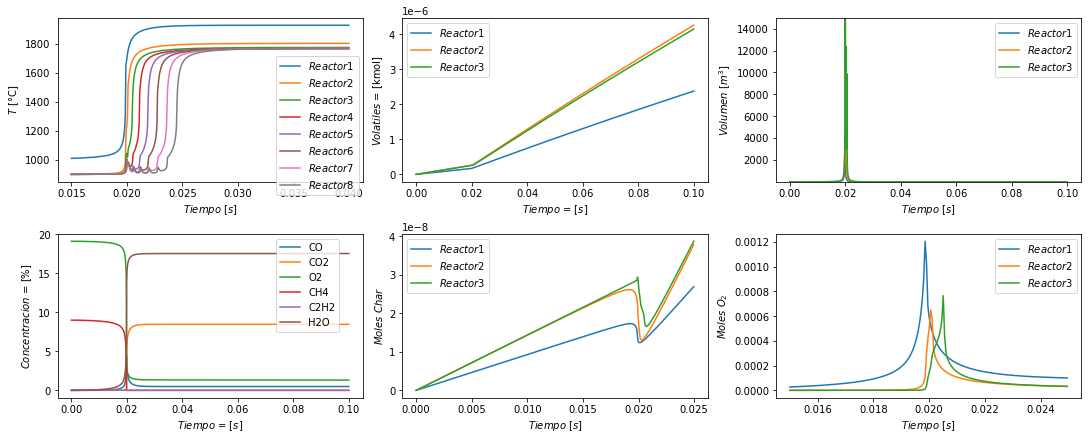

In [7]:
Tiempo = states.t                     # [m]
T_0 = states.T - 273.15             # [°C]
T_1 = states1.T - 273.15             # [°C]
T_2 = states2.T - 273.15             # [°C]
T_3 = states3.T - 273.15             # [°C]
T_4 = states4.T - 273.15             # [°C]
T_5 = states5.T - 273.15             # [°C]
T_6 = states6.T - 273.15             # [°C]
T_7 = states7.T - 273.15             # [°C]

P = states.P - 85113            # [Pa]
P1 = states1.P - 85113            # [Pa]
P2 = states2.P - 85113            # [Pa]
P3 = states3.P - 85113            # [Pa]
t = Tiempo
dot_V_0 = FT_0 * Rg * states.T / P_0
dot_V_1 = FT_1 * Rg * states1.T / P_0
dot_V_2 = FT_2 * Rg * states2.T / P_0

fig, ax = plt.subplots(2, 3, figsize=(15, 6), constrained_layout=True)  #Creamos la opción de graficar varias figuras en una pantalla
plt.rcParams['axes.grid'] = True

# En el cuadro 1 graficamos la temperatura del gas 
ax[0,0].plot(t[300:800], T_0[300:800], label='$Reactor1$')
ax[0,0].plot(t[300:800], T_1[300:800], label='$Reactor2$')
ax[0,0].plot(t[300:800], T_2[300:800], label='$Reactor3$')
ax[0,0].plot(t[300:800], T_3[300:800], label='$Reactor4$')
ax[0,0].plot(t[300:800], T_4[300:800], label='$Reactor5$')
ax[0,0].plot(t[300:800], T_5[300:800], label='$Reactor6$')
ax[0,0].plot(t[300:800], T_6[300:800], label='$Reactor7$')
ax[0,0].plot(t[300:800], T_7[300:800], label='$Reactor8$')
ax[0,0].set_xlabel('$Tiempo$ [$s$]') 
ax[0,0].set_ylabel('$T$ [°C]')
ax[0,0].legend(loc='upper left', bbox_to_anchor=(0.7, 0.8))

# En el cuadro 2 graficamos las especies reactivas pero solo para el inicio del horno
ax[0,1].plot(t, states.F_Volatiles_0 , label='$Reactor1$')
ax[0,1].plot(t, states1.F_Volatiles_1, label='$Reactor2$')
ax[0,1].plot(t, states2.F_Volatiles_1, label='$Reactor3$')
ax[0,1].set_xlabel('$Tiempo$ = [$s$]') 
ax[0,1].set_ylabel('$Volatiles$ = [kmol]')
ax[0,1].legend(loc='upper right', bbox_to_anchor=(0.3, 1))

# En el cuadro 3 graficamos las especies reactivas en todo el horno
for i in species_reac:
    ax[1,0].plot(t, states.X[:, gas.species_index(i)]*100, label=i)
ax[1,0].set_xlabel('$Tiempo$ = [$s$]') 
ax[1,0].set_ylabel('$Concentracion$ = [%]')
ax[1,0].legend(loc='upper left', bbox_to_anchor=(0.7, 1))

# En el cuadro 4 graficamos las concentración de CO en una región pequeña del horno
ax[1,1].plot(t[0:500], states.F_Char_0[0:500], label='$Reactor1$')
ax[1,1].plot(t[0:500], states1.F_Char_1[0:500], label='$Reactor2$')
ax[1,1].plot(t[0:500], states2.F_Char_1[0:500], label='$Reactor3$')
ax[1,1].set_xlabel('$Tiempo$ [$s$]') 
ax[1,1].set_ylabel('$Moles$ $Char$')
ax[1,1].legend(loc='upper right', bbox_to_anchor=(0.3, 1))

# En el cuadro 5 graficamos la presion
ax[0,2].plot(t, P, label='$Reactor1$')
ax[0,2].plot(t, P1, label='$Reactor2$')
ax[0,2].plot(t, P2, label='$Reactor3$')
ax[0,2].set_xlabel('$Tiempo$ [$s$]') 
ax[0,2].set_ylabel('$Volumen$ [$m^3$]')
ax[0,2].set_ylim(3.5,15000)
ax[0,2].legend(loc='upper left', bbox_to_anchor=(0.7, 1))

# En el cuadro 6 graficamos concentración de CO en todo el horno
ax[1,2].plot(t[300:500], F_CO_0[300:500], label='$Reactor1$')
ax[1,2].plot(t[300:500], F_CO_1[300:500], label='$Reactor2$')
ax[1,2].plot(t[300:500], F_CO_2[300:500], label='$Reactor3$')
ax[1,2].set_xlabel('$Tiempo$ [$s$]') 
ax[1,2].set_ylabel('$Moles$ $O_2$')
ax[1,2].legend(loc='upper left', bbox_to_anchor=(0.7, 1))

# Actividades

1) Determine la velocidad de llama turbulenta que predice el código para diferentes concentraciones de metano puro.

2) De acuerdo a los resultados que se obtienen, ¿considera usted que los resultados son congruentes con los reportados en datos experimentales?

3) ¿Cual es el efecto de incluir polvo de carbón en la velocidad de la llama?

4) Modifique las caracteristicas del polvo de carbón y determine cual es el efecto de estos cambios.

# References

 - Barrera Zapata R, Perez Bayer JF, Salazar Jiménez C. Carbones colombianos: clasificación y caracterización termoquímica para aplicaciones energéticas. rev.ion. 2014;27(2):43-54.
   
 - Biagini and Tognotti. A generalized correlation for coal devolatilization kinetics at high temperature. Fuel Processing Technology. 2014,126
 
 - Darabi. P. A mathematical model for cement kilns. Sharif University of Technology, 2004

 - Goodwin, D. G., Speth, R. L., Moffat, H. K., y Weber, B. W. (2021). Cantera: An object-
   oriented software toolkit for chemical kinetics, thermodynamics, and transport processes.
   https://www.cantera.org. (Version 2.5.1) doi: 10.5281/zenodo.4527812
   
 - T. Maffei, "Kinetic Model of Coal Combustion", Ph.D., POLITECNICO DI MILANO, 2013
   
 - Smith GP, Golden DM, Frenklach M, Moriarty NW, Eiteneer B, Goldenberg M, Bowman CT, Hanson RK, Song 
   SH, Gardiner WC Jr, Lissianski VV, Qin ZW. GRI-MECH 3.0, http://www.me.berkeley.edu/gri_mech/. 